# Jupyter Notebook for House Price Prediction

### Importing Required Libraries

In [1]:
import pandas as pd  # For working with tabular data
import numpy as np  # For working with arrays and mathematical operations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For advanced visualizations and statistical analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.svm import SVR  # For performing Support Vector Regression (SVR)
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance
from sklearn.preprocessing import StandardScaler  # For standardizing features

### Reading Data from CSV file

In [2]:
#reading data file
file_path = r'C:\Users\Core i7\Downloads\housePrice.csv'
data = pd.read_csv(file_path)

### Preprocessing the Data

In [3]:
#converting float to int and Non-numeric values to NAN
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

#Delete some row and column that have NAN value
data = data.dropna(subset=['Area', 'Address'])

#Delete some row value that are bigger than 1000 meter area
max_area = 1000
data = data[data['Area'] <= max_area]

#Delete some row and column that have NAN value
data = data.dropna(subset=['Price', 'Price(USD)'])

### Converting Binary Features to Numeric Values

In [4]:
#convert yes/No row to 0/1(binary) row 
data['Parking'] = data['Parking'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Warehouse'] = data['Warehouse'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Elevator'] = data['Elevator'].apply(lambda x: 1 if x == 'Yes' else 0)

### Calculating Correlation and Selecting Best Features

Correlation Matrix:
Area          0.722611
Room          0.567872
Parking            NaN
Warehouse          NaN
Elevator           NaN
Price         1.000000
Price(USD)    1.000000
Name: Price, dtype: float64


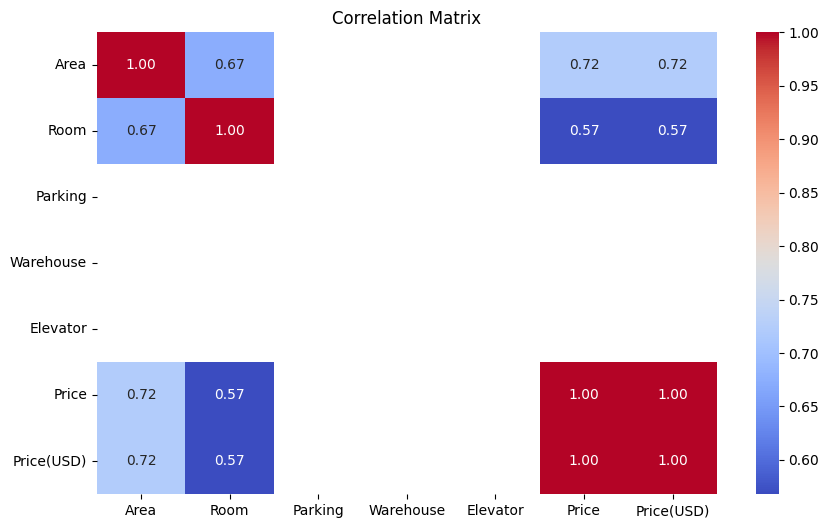

Selected Features: Index(['Price(USD)', 'Area'], dtype='object')


In [5]:
#comparison between features correlation
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix['Price'])

#make a picture or table with sizes
plt.figure(figsize=(10, 6))

#make heatmap from seaborn library for correlation matrix(annot=displayed numerical values for each square
#cmap=The color palette of "cold-warm" gradient, fmt=two decimal places )
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#finding the best feature that has the biggest corr with 'price' feature
#abs = just positive corr , sort_values(ascending=False) = sort from min to max
best_features = correlation_matrix['Price'].abs().sort_values(ascending=False).index[1:3]
print(f"Selected Features: {best_features}")

### Preparing the Data

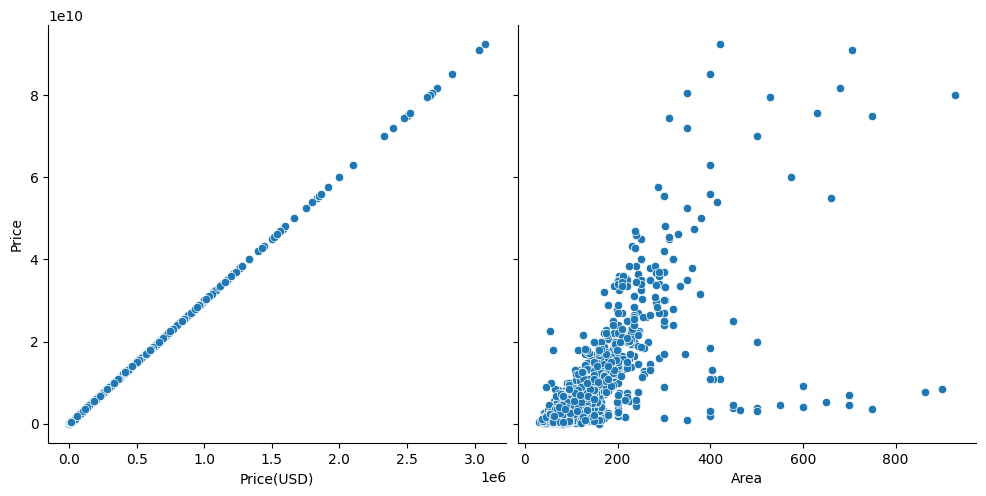

In [6]:
#make scatter plot of best features with 'price'
X = data[best_features]
y = data['Price']
sns.pairplot(data, x_vars=best_features, y_vars='Price', height=5, aspect=1, kind='scatter')
plt.show()

### Standardizing Features and Splitting Data

In [7]:
# Create a scaler object to standardize the data
scaler = StandardScaler()

# Standardize features in X to have mean 0 and standard deviation 1
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training Linear Regression and SVR Models

In [8]:
# Create a linear regression model
linear_model = LinearRegression()

# Train the linear regression model on the training data
linear_model.fit(X_train, y_train)

# Create an SVR (Support Vector Regression) model with an RBF kernel
svr_model = SVR(kernel='rbf')

# Train the SVR model on the same training data
svr_model.fit(X_train, y_train)

SVR()

### Evaluating Models

In [9]:
# Predict target values using the linear regression model on test data
y_pred_linear = linear_model.predict(X_test)

# Predict target values using the SVR model on test data
y_pred_svr = svr_model.predict(X_test)  

# Calculate Mean Absolute Error for linear regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)  

# Calculate Mean Squared Error for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)  

# Calculate Root Mean Squared Error for linear regression
rmse_linear = np.sqrt(mse_linear)  

# Calculate R-squared score for linear regression
r2_linear = linear_model.score(X_test, y_test) 

# Calculate Mean Absolute Error for SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr) 

# Calculate Mean Squared Error for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)  

# Calculate Root Mean Squared Error for SVR
rmse_svr = np.sqrt(mse_svr)  

# Calculate R-squared score for SVR
r2_svr = svr_model.score(X_test, y_test) 

# Print evaluation metrics for linear regression
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R2: {r2_linear}")  

# Print evaluation metrics for SVR
print(f"SVR - MAE: {mae_svr}, RMSE: {rmse_svr}, R2: {r2_svr}")  


Linear Regression - MAE: 63.549187021670136, RMSE: 79.20366742221807, R2: 0.9999999999999999
SVR - MAE: 4244882055.9382486, RMSE: 9165664658.426628, R2: -0.11040301475538872


### Predicting Prices with SVR Model

In [10]:
# Predict the prices using the SVR model and store them in a new column 'Predicted_Price'
data['Predicted_Price'] = svr_model.predict(X_scaled)

### Saving Results to CSV

In [11]:
# Define the file path to save the DataFrame as a CSV file
output_file_path = r'C:\Users\Core i7\Downloads\housePrice1.csv'

# Save the DataFrame to the specified CSV file without including the index
data.to_csv(output_file_path, index=False)

# Print a message confirming that the predicted prices have been saved
print(f"The predicted prices have been saved to {output_file_path}")


The predicted prices have been saved to C:\Users\Core i7\Downloads\housePrice1.csv


### Manual Train-Test Split

In [12]:
# Create a new DataFrame 'cdf' containing selected columns: 'Area', 'Room', 'Parking', 'Warehouse', 'Elevator', and 'Price'
cdf = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']]

# Create a random mask where approximately 80% of the data is marked as True (for training data)
msk = np.random.rand(len(data)) < 0.8

# Assign rows where the mask is True to the training set
train = cdf[msk]

# Assign rows where the mask is False to the testing set
test = cdf[~msk]


### Polynomial Features for Price Prediction

Coefficients:  [[ 0.00000000e+00  1.37807721e+08 -1.13732983e+05]]
Intercept:  [-7.54935767e+09]


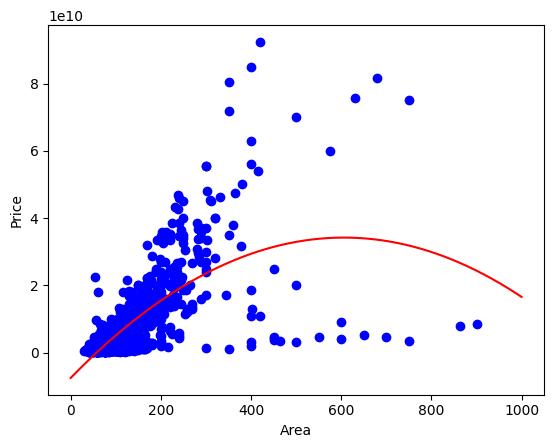

In [13]:
# Import PolynomialFeatures for creating polynomial features and linear_model for regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Convert 'Area' and 'Price' columns from the training set to numpy arrays
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

# Convert 'Area' and 'Price' columns from the testing set to numpy arrays
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

# Create polynomial features of degree 2 based on the 'Area' data
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

# Initialize a linear regression model
clf = linear_model.LinearRegression()

# Fit the linear regression model to the polynomial-transformed training data
train_y_ = clf.fit(train_x_poly, train_y)

# Print the coefficients (weights) of the polynomial model
print('Coefficients: ', clf.coef_)

# Print the intercept (bias) of the polynomial model
print('Intercept: ', clf.intercept_)

# Plot the training data points (Area vs Price)
plt.scatter(train.Area, train.Price, color='blue')

# Create an array of values for the 'Area' to use for plotting the polynomial curve
XX = np.arange(0.0, 1000.0, 0.1)

# Calculate the predicted 'Price' values based on the polynomial equation
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)

# Plot the polynomial regression curve in red
plt.plot(XX, yy, '-r')

# Set the label for the y-axis
plt.ylabel("Price")

# Set the label for the x-axis
plt.xlabel("Area")

# Display the plot
plt.show()


## Author

Mostafa Haji Shafiei